Ref: https://www.joinquant.com/post/7922

本节以 鲍鱼数据集 为例。此数据集记录了鲍鱼的长度，宽度，重量等指标，最后一列数据就是“环数”（即年龄，和树的年轮类似）。

这是一个基于因素变量的实数值预测，属于回归问题。

In [4]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
import pandas as pd

target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(target_url, header=None, prefix='V')
df.columns = ['性别','长度','直径','高度','整体重量', '去壳重量', '脏器重量', '壳的重量', '环数']

print ("数据集规模：",df.shape)

print ("\n数据集数据类型：\n",df.get_dtype_counts())

print ('\n数据集头5条数据：\n',df.head())

print ('\n数据集描述：\n', df.describe())

数据集规模： (4177, 9)

数据集数据类型：
 float64    7
int64      1
object     1
dtype: int64

数据集头5条数据：
   性别     长度     直径     高度    整体重量    去壳重量    脏器重量   壳的重量  环数
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7

数据集后5条数据：
      性别     长度     直径     高度    整体重量    去壳重量    脏器重量    壳的重量  环数
4172  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4173  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4174  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4175  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4176  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

数据集描述：
                 长度           直径           高度         整体重量         去壳重量  \
count  4177.000000  4177.000000  4177.000000  4177.000000

## 绘制箱线图
箱线图也是一种识别异常点的强大工具：
- 中位数：中间红线；
- 25%分位数：箱顶；
- 75%分位数：箱底；
- 上边缘水平线： 到箱顶的距离是箱高的1.4倍（默认参数）, 即4分位间距的1.4倍
- 下边缘水平线： 到箱底的距离是箱高的1.4倍（默认参数）, 即4分位间距的1.4倍
- 异常值： 上下边缘以外的数据。

下面第一张图由于年轮数远大于其他指标，看不清楚，剔除年龄数于是有第二张图。
第二张图进行标准化于是有第三张图。

注意：书中将normalization翻译成"归一化"似乎不合理，应该翻译成标准化。

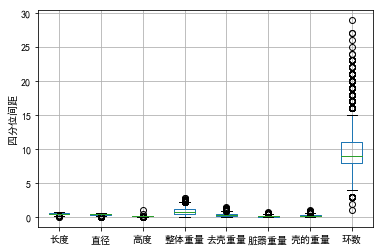

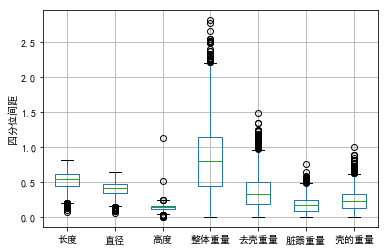

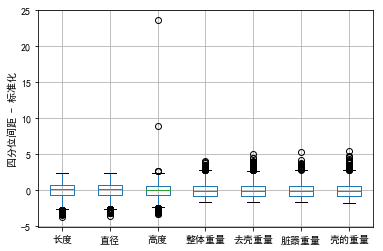

In [7]:
import matplotlib.pyplot as plt

df.iloc[:,range(1,9)].boxplot()
plt.ylabel("四分位间距")
plt.show()

_df = df.iloc[:,range(1,8)]
_df.boxplot()
plt.ylabel("四分位间距")
plt.show()

((_df - _df.mean()) / _df.std()).boxplot()
plt.ylabel("四分位间距 - 标准化")
plt.show()

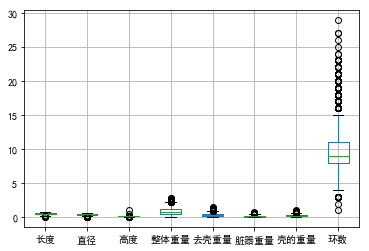